# Demo

Demonstrate `httm` image transformations.

## Getting Started

### Importing `matplotlib`

To start, we will import `matplotlib` and increase the figure size so we can reasonably see artifacts in various FITS images we are going to be looking at.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

### Bringing in a FITS File

Assume you have a file: 
    
    fits_files/calibrated_fits/spot50.fits

...containing an idealized FITS image, output from optical simulation.

First, let's just look at it.

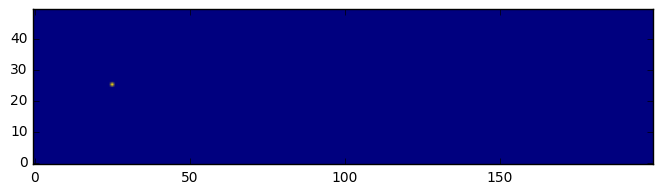

In [3]:
from astropy.io import fits as pyfits
import numpy
spot50=pyfits.open('fits_files/calibrated_fits/spot50.fits')
matplotlib.pyplot.imshow(numpy.log10(spot50[0].data),clim=(2,8))
matplotlib.pyplot.gca().invert_yaxis()

Here, we've got a 50 x 200 image. HTTM will assume this is four slices of 50 x 50 by default. We have 1000000 electrons in one pixel in the center of slice 0.

To get started in HTTM, open this file and extract a `httm.data_structures.calibrated_converter.SingleCCDCalibratedConverter` object.

This is done by calling `httm.fits_utilities.calibrated_fits.calibrated_converter_from_fits`.

In [4]:
from httm.fits_utilities.calibrated_fits import calibrated_converter_from_fits

ideal_data = calibrated_converter_from_fits('fits_files/calibrated_fits/spot50.fits')

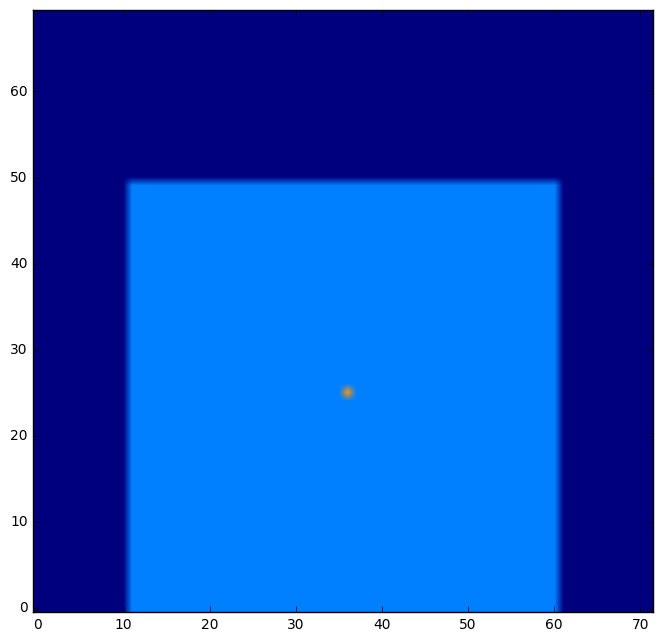

In [5]:
matplotlib.pyplot.imshow(numpy.log10(ideal_data.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [6]:
from httm.transformations.calibrated_converters_to_raw import introduce_smear_rows

In [7]:
smeared=introduce_smear_rows(ideal_data)

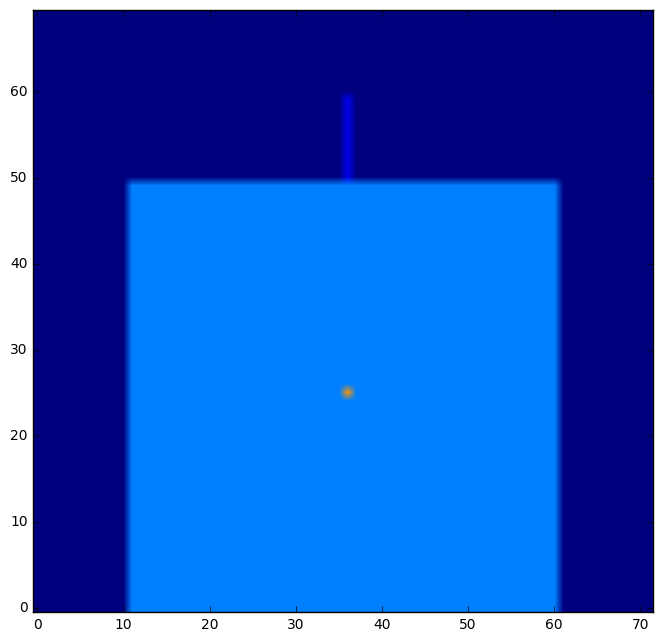

In [8]:
matplotlib.pyplot.imshow(numpy.log10(smeared.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [9]:
from httm.transformations.calibrated_converters_to_raw import add_shot_noise

In [10]:
shot = add_shot_noise(smeared)

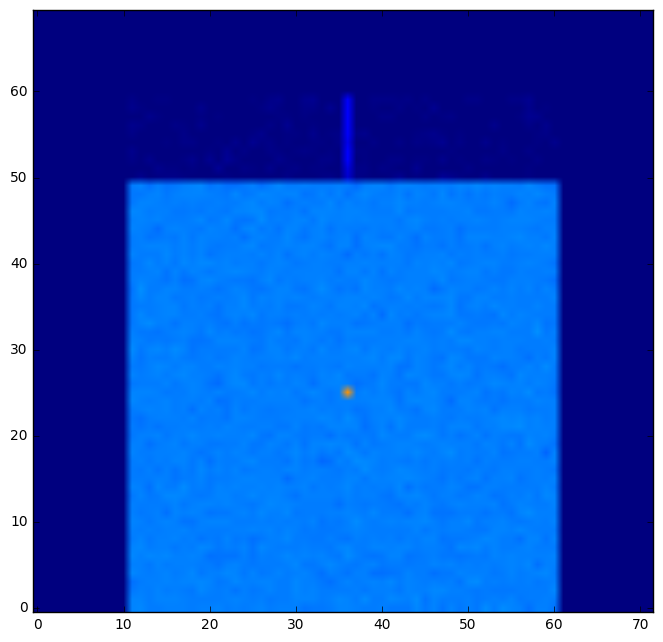

In [11]:
matplotlib.pyplot.imshow(numpy.log10(shot.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [12]:
from httm.transformations.calibrated_converters_to_raw import simulate_blooming

In [13]:
bloomed = simulate_blooming(shot)

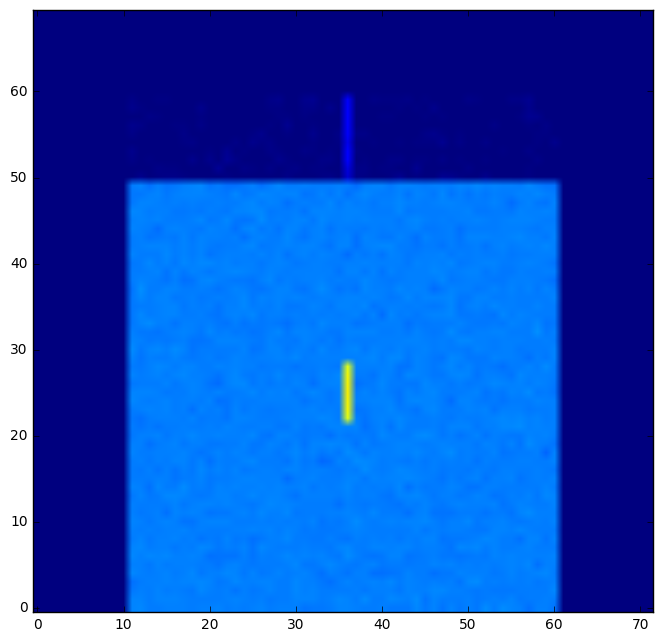

In [14]:
matplotlib.pyplot.imshow(numpy.log10(bloomed.slices[0].pixels+1), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [15]:
from httm.transformations.calibrated_converters_to_raw import add_readout_noise

In [16]:
noisy = add_readout_noise(bloomed)

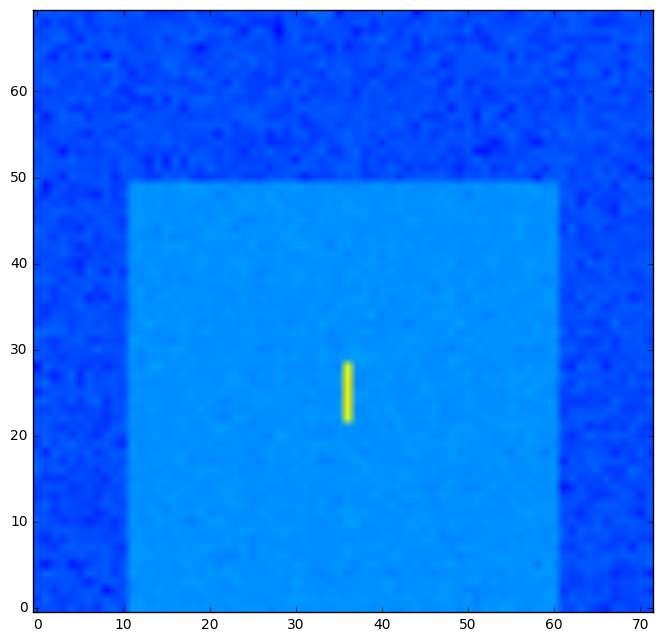

In [17]:
matplotlib.pyplot.imshow(numpy.log10(noisy.slices[0].pixels+40), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [18]:
from httm.transformations.calibrated_converters_to_raw import simulate_undershoot

In [19]:
undershot=simulate_undershoot(noisy)

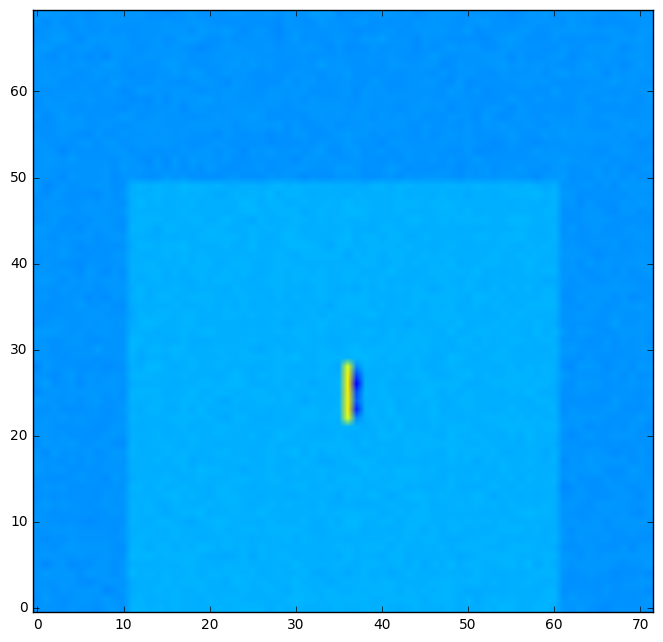

In [20]:
matplotlib.pyplot.imshow(numpy.log10(undershot.slices[0].pixels+150), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [21]:
from httm.transformations.calibrated_converters_to_raw import add_baseline

In [22]:
baselined = add_baseline(undershot)

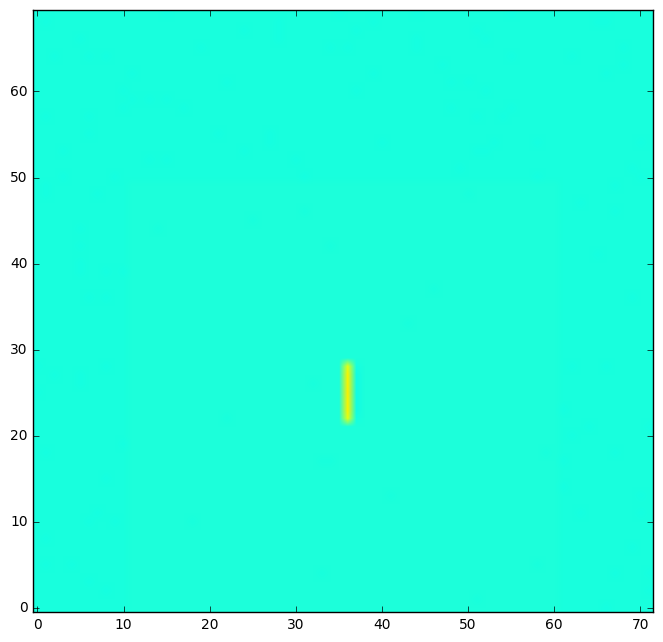

In [26]:
matplotlib.pyplot.imshow(numpy.log10(baselined.slices[0].pixels), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [27]:
from httm.transformations.calibrated_converters_to_raw import convert_electrons_to_adu

In [28]:
raw = convert_electrons_to_adu(baselined)

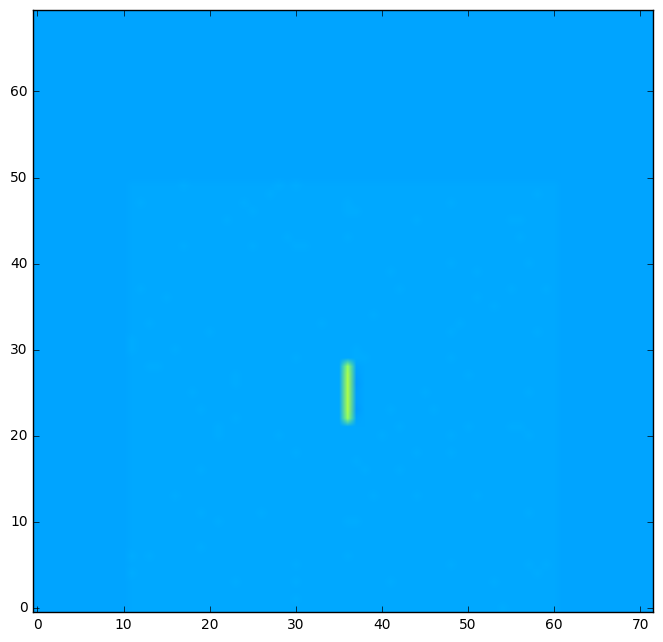

In [29]:
matplotlib.pyplot.imshow(numpy.log10(raw.slices[0].pixels), clim=(0,8))
matplotlib.pyplot.gca().invert_yaxis()

In [30]:
raw.slices[0].pixels

array([[ 198.46350354,  198.30500407,  198.56119501, ...,  197.14884725,
         198.69962666,  197.7755937 ],
       [ 196.79602281,  202.22939727,  197.38164551, ...,  196.78124729,
         198.56381196,  199.47330565],
       [ 198.93110846,  199.14365641,  195.86676853, ...,  197.90235435,
         198.78809983,  195.29477276],
       ..., 
       [ 197.04253793,  198.8595373 ,  199.48491589, ...,  196.97042089,
         200.25773076,  199.271551  ],
       [ 199.87528318,  194.74987756,  199.22091843, ...,  198.28471216,
         198.72671327,  198.11674191],
       [ 198.63939585,  201.31394102,  198.53807407, ...,  200.57434318,
         198.16168028,  198.14790194]])

In [31]:
from httm.fits_utilities.raw_fits import write_RAW_fits

In [32]:
write_RAW_fits(raw,'spot50_raw.fits')